# Analysis of demon output with signatures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Analysing output.dat

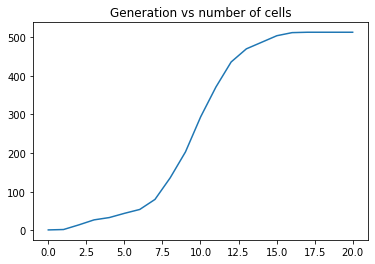

In [2]:
output = pd.read_csv("../prog/output_data/output.dat", sep='\t')
#print(output[['Generation', 'NumCells', 'S1(MeanNum)', 'S2(MeanNum)', 'S3(MeanNum)']])

plt.plot(output['Generation'], output['NumCells'])
plt.title('Generation vs number of cells')
plt.show()

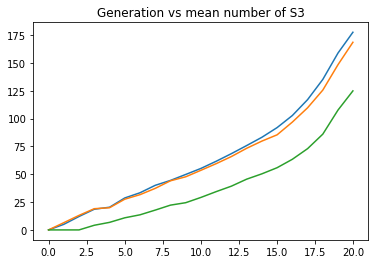

In [3]:
for i in ['S1(MeanNum)', 'S2(MeanNum)', 'S3(MeanNum)'] :
    plt.plot(output['Generation'], output[i])
plt.title('Generation vs mean number of S3')
plt.show()

### Analysing Clones.dat

In [4]:
clones = pd.read_csv("../prog/output_data/clones.dat", sep='\t')
## print(clones[['Generation', 'NumCells', 'S1(MeanNum)', 'S2(MeanNum)', 'S3(MeanNum)']])
clones.head()

,Generation,Clone,Deme,Genotype,DriverGenotype,Parent,DriverParent,X,Y,NormalCells,...,BirthRate,MigrationRate,DeathRate,MigrationModifier,DriverMutations,MigrationMutations,PassengerMutations,S1Mutations,S2Mutations,S3Mutations
0,0.00000,0,0,0,0,0,0,72,72,511,...,1.000000,0.000088,0.0,0.001953,0,0,0,0,0,0
1,10.01369,0,0,1136,9,964,1,72,72,218,...,1.589032,0.000088,0.0,0.574219,2,0,136,59,55,24
2,10.01369,1,0,1527,6,1249,4,72,72,218,...,1.407952,0.000088,0.0,0.574219,3,0,146,59,59,31
3,10.01369,2,0,2015,3,1918,0,72,72,218,...,1.262540,0.000088,0.0,0.574219,1,0,113,48,39,27
4,10.01369,3,0,1417,6,1390,4,72,72,218,...,1.407952,0.000088,0.0,0.574219,3,0,134,59,46,32


Make sure that the number of signature-specific mutations are the same as the new passenger and driver mutations. Migration mutations are so far put to zero, but if there were some I would have to rethingk the code: I don't think they would have to be attributed from the signature-specific mutations but from already-drawn mutations, which might make everything much more difficult.

In [5]:
np.all(np.sum(clones[['S1Mutations', 'S2Mutations', 'S3Mutations']], axis=1) == np.sum(clones[['DriverMutations', 'MigrationMutations', 'PassengerMutations']], axis=1))

True

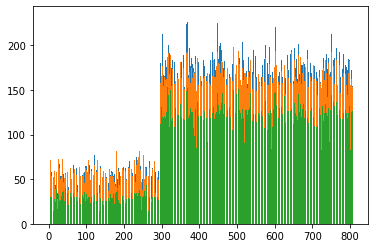

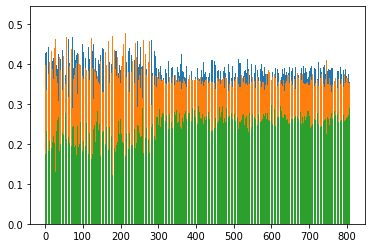

In [6]:
for i in ['S1Mutations', 'S2Mutations', 'S3Mutations'] :
    plt.bar(range(clones.shape[0]), clones[i])
plt.show()

## normalised version
## there must be an error here
clones_norm = clones
clones_norm[['S1Mutations', 'S2Mutations', 'S3Mutations']] = clones[['S1Mutations', 'S2Mutations', 'S3Mutations']]/np.sum(clones[['S1Mutations', 'S2Mutations', 'S3Mutations']], axis=1)[:, np.newaxis]
for i in ['S1Mutations', 'S2Mutations', 'S3Mutations'] :
    plt.bar(range(clones.shape[0]), clones[i]/np.sum(clones[['S1Mutations', 'S2Mutations', 'S3Mutations']], axis=1))
plt.show()
    
    

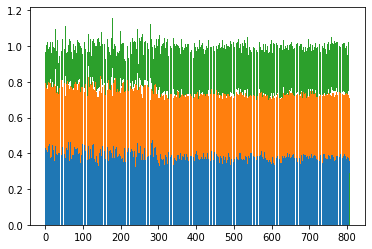

In [11]:
# for i in ['S1Mutations', 'S2Mutations', 'S3Mutations'] :
#     plt.bar(range(clones_norm.shape[0]), clones_norm[i])
# plt.show()

plt.bar(range(clones_norm.shape[0]), clones_norm['S1Mutations'], 0.9)
plt.bar(range(clones_norm.shape[0]), np.array(clones_norm['S2Mutations']), 0.9, bottom=np.concatenate((np.array([0]), np.array(clones_norm['S1Mutations'])[1:])))
plt.bar(range(clones_norm.shape[0]), np.array(clones_norm['S3Mutations']), 0.9, bottom=np.concatenate((np.array(clones_norm['S1Mutations']+clones_norm['S2Mutations'])[1:], np.array([0]))))
plt.show()

## this needs to be debugged. why the error though?! is it the first one that is problematic?

In [9]:
# np.concatenate(np.array([0]), np.array(clones_norm['S1Mutations']+clones_norm['S2Mutations'])[1:]))
# np.concatenate(np.array([0]), np.array(clones_norm['S1Mutations']+clones_norm['S2Mutations'])[1:])
np.concatenate((np.array(clones_norm['S1Mutations']+clones_norm['S2Mutations'])[1:], np.array([0])))
# np.array(clones_norm['S1Mutations']+clones_norm['S2Mutations'])[1:]
# np.concatenate((np.array([0]), np.array([0])))

array([0.82608696, 0.79194631, 0.76315789, 0.76642336, 0.81481481,
       0.76100629, 0.7826087 , 0.78873239, 0.81818182, 0.80147059,
       0.8       , 0.79207921, 0.87931034, 0.79069767, 0.81512605,
       0.79259259, 0.81081081, 0.77358491, 0.77272727, 0.79605263,
       0.73648649, 0.77876106, 0.77358491, 0.7875    , 0.7987013 ,
       0.78980892, 0.77391304, 0.87037037, 0.83225806, 0.76811594,
       0.73846154, 0.79230769, 0.74074074, 0.77372263, 0.82835821,
       0.73267327, 0.78823529, 0.81714286, 0.76258993, 0.73571429,
       0.8       , 0.79032258, 0.83471074, 0.80916031, 0.73856209,
       0.7721519 , 0.81097561, 0.7972973 , 0.77857143, 0.75694444,
       0.80874317, 0.79166667, 0.79      , 0.72222222, 0.83216783,
       0.82706767, 0.7875    , 0.77564103, 0.84137931, 0.80555556,
       0.76190476, 0.78181818, 0.78625954, 0.75694444, 0.79874214,
       0.78343949, 0.77884615, 0.80620155, 0.79591837, 0.8045977 ,
       0.7706422 , 0.82857143, 0.7578125 , 0.7972973 , 0.75524

In [10]:



# plt.bar([0,1], [0.2, 0.2], 0.2, bottom=np.array([0.0, 0.0]))
# plt.bar([0,1], [0.7, 0.6], 0.2, bottom=np.array([0.2, 0.4]))
# plt.bar([0,1], [0.1, 0.2], 0.2, bottom=np.array([0.9, 0.6]))
# plt.show()


In [13]:
(np.sum(clones_norm[['S1Mutations', 'S2Mutations', 'S3Mutations']], axis=1)).head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [23]:
range(clones_norm.shape[0])

range(0, 808)

In [26]:
len(np.array(clones_norm['S2Mutations']))
type(np.array(clones_norm['S2Mutations']))

numpy.ndarray

In [31]:
len(np.array(clones_norm['S1Mutations']).tolist())
type(np.array(clones_norm['S1Mutations']).tolist())

list

In [25]:
clones_norm.iloc[2]

Generation              10.013690
Clone                    1.000000
Deme                     0.000000
Genotype              1527.000000
DriverGenotype           6.000000
Parent                1249.000000
DriverParent             4.000000
X                       72.000000
Y                       72.000000
NormalCells            218.000000
Population               1.000000
BirthRate                1.407952
MigrationRate            0.000088
DeathRate                0.000000
MigrationModifier        0.574219
DriverMutations          3.000000
MigrationMutations       0.000000
PassengerMutations     146.000000
S1Mutations              0.395973
S2Mutations              0.395973
S3Mutations              0.208054
Name: 2, dtype: float64